In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)
# Create Dataframe
df = pd.read_csv(r"loan_data.csv")
# Print shape of dataset
print(df.shape)

(614, 13)


In [3]:
df.drop('Loan_ID',axis=1,inplace=True)

In [4]:
# Define numeric and categorical features
numeric_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
categorical_features = [col for col in df.columns if col not in numeric_features]

def impute_and_encode(df, numeric_features, categorical_features):

  # Impute missing values
  for col in df.columns:
    if col in numeric_features:
      df[col] = df[col].fillna(df[col].mean())  # Impute with mean for numerical columns
    elif col in categorical_features:
      df[col] = df[col].fillna(df[col].mode()[0])  # Impute with mode for categorical columns
    else:
      raise ValueError(f"Column '{col}' not found in either numeric_features or categorical_features lists.")
  return df

# Impute and encode the DataFrame
df = impute_and_encode(df.copy(), numeric_features, categorical_features)

# Print the modified DataFrame
print(df)


     Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No          0      Graduate            No             5849   
1      Male     Yes          1      Graduate            No             4583   
2      Male     Yes          0      Graduate           Yes             3000   
3      Male     Yes          0  Not Graduate            No             2583   
4      Male      No          0      Graduate            No             6000   
..      ...     ...        ...           ...           ...              ...   
609  Female      No          0      Graduate            No             2900   
610    Male     Yes         3+      Graduate            No             4106   
611    Male     Yes          1      Graduate            No             8072   
612    Male     Yes          2      Graduate            No             7583   
613  Female      No          0      Graduate           Yes             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [5]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [6]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


Split X and Y

In [7]:
x = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']

In [8]:
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [9]:
# If the target column has Denied it is encoded as 1 others as 0
y= np.where(y=='N', 1,0)

In [10]:
y

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,

FEATURE TRANSFORMATION

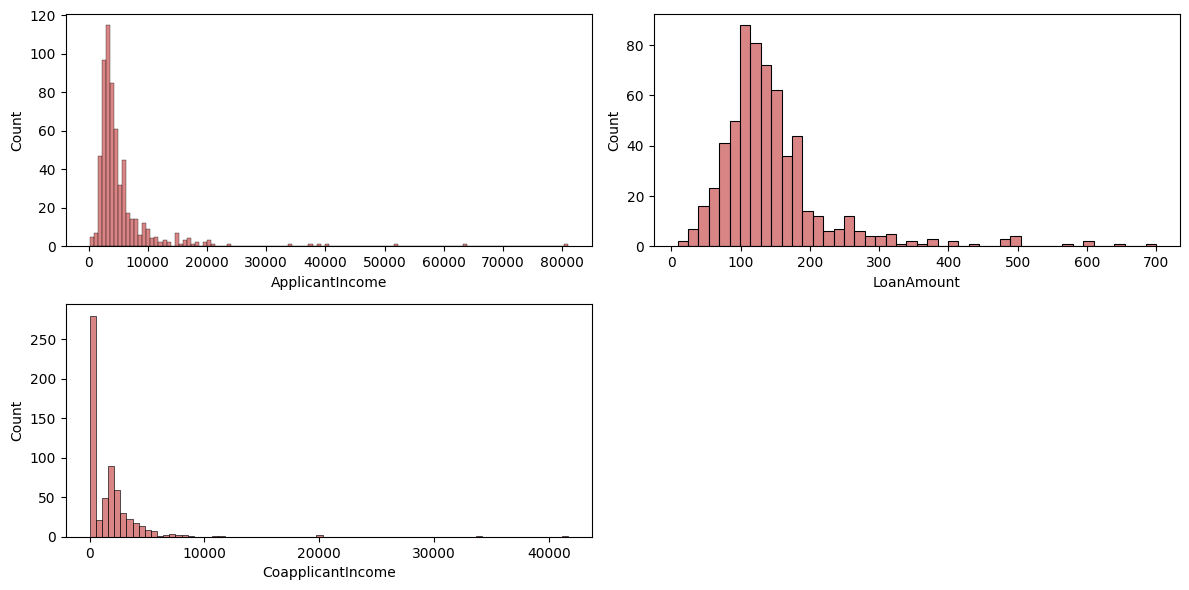

In [11]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(["ApplicantIncome","LoanAmount","CoapplicantIncome"]):
  # Access data using column name
  plt.subplot(2, 2, i+1)
  sns.histplot(x=x[col], color='indianred')  # Use column name for data
  plt.xlabel(col)
  plt.tight_layout()


In [12]:
# Check Skewness
x[numeric_features].skew(axis=0, skipna=True)

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
dtype: float64

In [13]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
X_copy = pt.fit_transform(df[["ApplicantIncome", "LoanAmount", "CoapplicantIncome"]])

In [14]:
X_copy = pd.DataFrame(X_copy, columns=["ApplicantIncome", "LoanAmount", "CoapplicantIncome"])

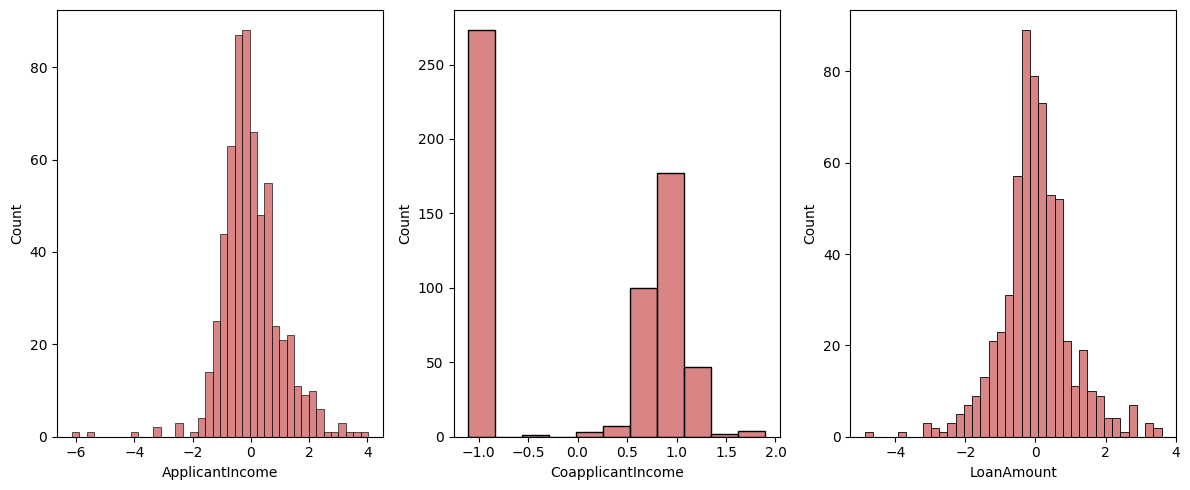

In [15]:
plt.figure(figsize=(12, 5))
for i, col in enumerate(numeric_features):
    plt.subplot(1, 3, i+1)
    sns.histplot(x=X_copy[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [16]:
X_copy.skew(axis=0, skipna=True)

ApplicantIncome     -0.092946
LoanAmount           0.024376
CoapplicantIncome   -0.145646
dtype: float64

In [17]:
# Create Column Transformer with 3 types of transformers

or_columns = []
oh_columns = ['Gender','Married','Education','Self_Employed','Property_Area','Credit_History','Dependents','Loan_Amount_Term']
transform_features= ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()

transform_pipe = Pipeline(steps=[
    ('transformer', PowerTransformer(method='yeo-johnson'))
])

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, oh_columns),
        ("Ordinal_Encoder", ordinal_encoder, or_columns),
        ("Transformer", transform_pipe, transform_features)
       
    ]
)

In [18]:
X=preprocessor.fit_transform(x)

In [19]:
X

array([[ 0.        ,  1.        ,  1.        , ...,  0.5443313 ,
        -1.10283684,  0.23538679],
       [ 0.        ,  1.        ,  0.        , ...,  0.17097382,
         0.75057774, -0.0376586 ],
       [ 0.        ,  1.        ,  0.        , ..., -0.49995512,
        -1.10283684, -1.34630531],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  1.02348683,
         0.20860307,  1.37240931],
       [ 0.        ,  1.        ,  0.        , ...,  0.93175029,
        -1.10283684,  0.73892362],
       [ 1.        ,  0.        ,  1.        , ...,  0.17097382,
        -1.10283684,  0.03993645]])

CLASSIFICATION

In [20]:
from imblearn.combine import SMOTETomek, SMOTEENN

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTEENN(random_state=42,sampling_strategy='minority' )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X, y)

Train Test Split

In [21]:
from sklearn.model_selection import  train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((358, 30), (90, 30))

In [22]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [23]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [24]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()

}

In [25]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    models_list = []
    accuracy_list = []
    auc= []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)
        
    return report

MODEL TRAINING

In [26]:
base_model_report =evaluate_models(X=X_res, y=y_res, models=models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9778
- F1 score: 0.9792
- Precision: 1.0000
- Recall: 0.9592
- Roc Auc Score: 0.9796


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9556
- F1 score: 0.9583
- Precision: 0.9787
- Recall: 0.9388
- Roc Auc Score: 0.9572


Gradient Boosting
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9556
- F1 score: 0.9583
- Precision: 0.9787
- Recall: 0.9388
- Roc Auc Score: 0.9572


Logistic Regression
Model performance for Training 

In [27]:
base_model_report

,Model Name,Accuracy
0,Random Forest,0.977778
6,CatBoosting Classifier,0.977778
1,Decision Tree,0.955556
2,Gradient Boosting,0.955556
5,XGBClassifier,0.955556
4,K-Neighbors Classifier,0.933333
7,Support Vector Classifier,0.933333
8,AdaBoost Classifier,0.922222
3,Logistic Regression,0.877778


In [28]:
#Initialize few parameter for Hyperparamter tuning
xgboost_params = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}

rf_params = {
    "max_depth": [10, 12, None, 15, 20],
    "max_features": ['sqrt', 'log2', None],
    "n_estimators": [10, 50, 100, 200]
}

knn_params = {
    "algorithm": ['auto', 'ball_tree', 'kd_tree','brute'],
    "weights": ['uniform', 'distance'],
    "n_neighbors": [3, 4, 5, 7, 9],
}

In [29]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ('XGBoost', XGBClassifier(), xgboost_params),
    ("RF", RandomForestClassifier(), rf_params),
    ("KNN", KNeighborsClassifier(), knn_params)
]

In [30]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2, 
                                   n_jobs=-1)
    random.fit(X_res, y_res)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 12 candidates, totalling 36 fits


Fitting 3 folds for each of 60 candidates, totalling 180 fits
Fitting 3 folds for each of 40 candidates, totalling 120 fits
---------------- Best Params for XGBoost -------------------
{'min_child_weight': 1, 'max_depth': 7}
---------------- Best Params for RF -------------------
{'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': None}
---------------- Best Params for KNN -------------------
{'weights': 'distance', 'n_neighbors': 4, 'algorithm': 'auto'}


In [31]:
model_param

{'XGBoost': {'min_child_weight': 1, 'max_depth': 7},
 'RF': {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': None},
 'KNN': {'weights': 'distance', 'n_neighbors': 4, 'algorithm': 'auto'}}

In [32]:
from sklearn.metrics import roc_auc_score,roc_curve
best_models = {
    "Random Forest Classifier": RandomForestClassifier(**model_param['RF']),
    "KNeighborsClassifier": KNeighborsClassifier(**model_param['KNN']),
    "XGBClassifier": XGBClassifier(**model_param['XGBoost'],n_jobs=-1),
}
tuned_report =evaluate_models(X=X_res, y=y_res, models=best_models)

Random Forest Classifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9778
- F1 score: 0.9792
- Precision: 1.0000
- Recall: 0.9592
- Roc Auc Score: 0.9796


KNeighborsClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9444
- F1 score: 0.9505
- Precision: 0.9231
- Recall: 0.9796
- Roc Auc Score: 0.9410


XGBClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9556
- F1 score: 0.9592
- Precision: 0.9592
- Recall: 0.9592
- Roc Auc Score: 0.9552




In [33]:
tuned_report

,Model Name,Accuracy
0,Random Forest Classifier,0.977778
2,XGBClassifier,0.955556
1,KNeighborsClassifier,0.944444


In [34]:
best_model = RandomForestClassifier(**model_param['RF'])
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("FINAL MODEL 'RF'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL MODEL 'RF'
Accuracy Score value: 0.9778
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        41
           1       1.00      0.96      0.98        49

    accuracy                           0.98        90
   macro avg       0.98      0.98      0.98        90
weighted avg       0.98      0.98      0.98        90



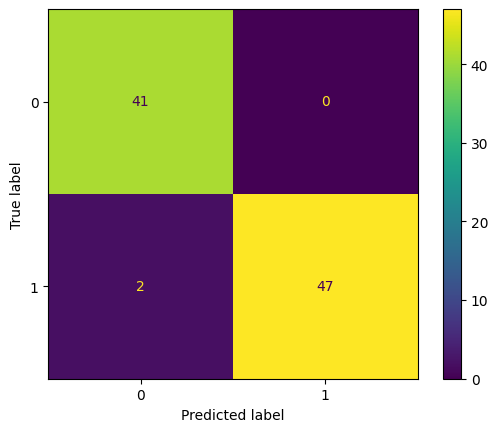

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)